[*********************100%***********************]  1 of 1 completed

Confidence level: 99.99%, VaR: 79.67
Confidence level: 99.9%, VaR: 75.28
Confidence level: 99%, VaR: 58.39
Confidence level: 97.5%, VaR: 49.60
Confidence level: 95%, VaR: 41.91
Confidence level: 90%, VaR: 32.64


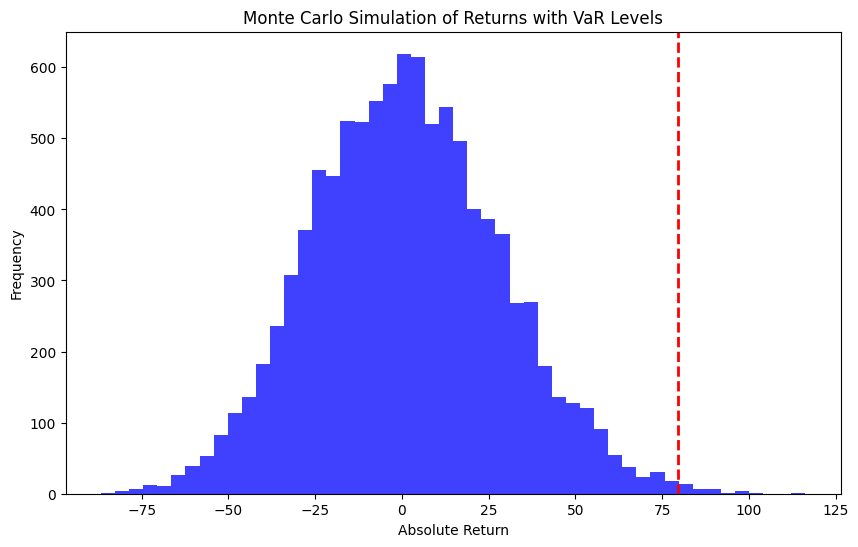

In [2]:
import numpy as np
import pandas as pd
import yfinance as yf
import scipy.stats as scs
import matplotlib.pyplot as plt

# 1. yfinance를 사용해 실제 주가 데이터를 불러옵니다
ticker = 'SPY'  # S&P 500 ETF
start_date = '2020-01-01'
end_date = '2023-01-01'

# 주가 데이터를 가져오기
data = yf.download(ticker, start=start_date, end=end_date)

# 2. 일일 수익률을 계산합니다.
data['Returns'] = data['Adj Close'].pct_change()

# 3. 시뮬레이션에 필요한 파라미터를 설정합니다
S0 = data['Adj Close'].iloc[-1]  # 현재 주가 (마지막 주가)
r = 0.05  # 무위험 이자율
sigma = data['Returns'].std() * np.sqrt(252)  # 연간 변동성 (일일 변동성에  1년 평균 거래일 수인 252거래일을 반영)
T = 30 / 365  # 30일 기간
n_simulations = 10000  # 시뮬레이션 횟수

# 4. 몬테카를로 시뮬레이션 수행
np.random.seed(14)  # 결과 재현성을 위한 시드 고정
W = np.random.standard_normal(n_simulations)  # 표준 정규분포에서 난수 생성
ST = S0 * np.exp((r - 0.5 * sigma**2) * T + sigma * np.sqrt(T) * W)  # 주가 경로 생성

# 5. 절대 수익률 계산
R_gbm = np.sort(ST - S0)

# 6. 백분위수에 따른 VaR 계산
percentiles = [0.01, 0.1, 1, 2.5, 5, 10]
var = scs.scoreatpercentile(R_gbm, percentiles)

# 7. VaR 결과 출력
for pair in zip(percentiles, var):
    print(f"Confidence level: {100 - pair[0]}%, VaR: {-pair[1]:.2f}")

# 8. 히스토그램으로 시뮬레이션 결과 시각화
plt.figure(figsize=(10, 6))
plt.hist(R_gbm, bins=50, alpha=0.75, color='blue')
plt.axvline(-var[0], color='red', linestyle='dashed', linewidth=2)  # 예: 99% VaR
plt.xlabel("Absolute Return")
plt.ylabel("Frequency")
plt.title(f"Monte Carlo Simulation of Returns with VaR Levels")
plt.show()
